In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#Homework 4

Copy this notebook. Rename it as: YOURNAME-HW4-matplotlib-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

.

Upload your completed jupyter notebook to elearning site in a zip labeled with your name, as a minimum something like YOURNAME-HW4.zip Do not put this notebook on your github.

Couple of reference site:
<ul>
<li/>http://matplotlib.org/examples/pylab_examples/
<li/>http://docs.scipy.org/doc/numpy/
</ul>

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. To do more to create tutorials on how to create an interesting plot or set of plots that are not in this HW.

Describe what you are doing so others can follow in creating the plots.

#### Homework 4.1

4.1.a Create a figure with two subplots in a row.
One shows a sine wave of x from with x = 0 ... 2*pi the other shows the tagent of x with the same range.
Label the figures.

Should look something like:
<img src="./images/Figure_with_multipleplot.png" width="300" height="200">



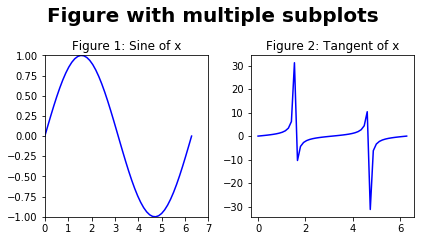

In [3]:
fig = plt.figure(figsize=(6,3))
fig.suptitle('Figure with multiple subplots',fontsize=20,y=1.1,fontweight='bold')
ax1 = fig.add_subplot(121)
ax1.set_title("Figure 1: Sine of x")
x = np.linspace(0,2*np.pi,endpoint=True)
plt.plot(x,np.sin(x),'b')    
plt.axis([0, 7, -1, 1])
plt.xticks(range(8))
ax2 = fig.add_subplot(122)
ax2.set_title("Figure 2: Tangent of x")
plt.plot(x,np.tan(x),'b')
plt.tight_layout()

#### Homework 4.2
 

Make a combined plot of a  red spiral with a scatter plot.

The red spiral has r from 0 to 3 with steps of 0.1 and
a theta of 2 * pi * r.

The scatter uses the same theta as the spiral but the radius r is offset by a random value ranging from -.5 to .5.
The size of the plotted locations is 100 * r^2 and the color uses theta.

Use an alpha value of .4 for the colors in the scatter plot.
Limit the size of the plot (rmax) to 2.5
 
 Should look something like:
<img src="./images/lineplot_with_scatterplot.png" width="300" height="200">


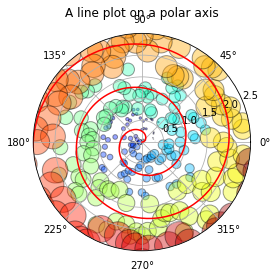

In [13]:
r=np.arange(0,3,0.01)
theta=2*np.pi*r
rnd = np.random.uniform(-0.5,0.5,r.size)
r1=r+rnd
ax1 = plt.subplot(111, projection='polar')
ax1.set_title('A line plot on a polar axis')
ax1.set_rlim(0,2.5)
ax1.plot(theta,r,'r')
ax1.scatter(theta,r1,c=theta,s=100*r*r,alpha=0.4,marker='o',cmap='jet',edgecolors='black')

#### Homework 4.3
Create a 2d histogram of 100000 points

x is a generated from a normal random distribution 

y is generated from a geometric random value witha p=.01 
Use the LogNorm color settings for hist2d.
And show the colorbar as well.

Should look something like:
<img src="./images/2d_histogram.png" width="300" height="200">


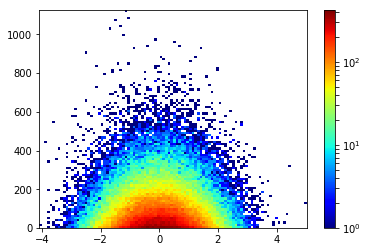

In [39]:
from matplotlib.colors import LogNorm
x= np.random.normal(size=100000)
y= np.random.geometric(p=0.01, size=100000)
plt.hist2d(x, y, bins=100, norm=LogNorm(),cmap='jet')
plt.colorbar()
plt.show()

#### Homework 4.4
Show the same data in homewowrk 4.3 in a 3d plot.
Use a numpy.histrogram2d funtion to generate the data:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Need to use statements:

<em>from mpl_toolkits.mplot3d import Axes<br/>
fig = plt.figure()<br/>
ax = fig.gca(projection='3d')</em>

...

ax.plot_surface(xm,ym,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

</em>

Should look something like:
<img src="./images/3dplot.png" width="300" height="200">


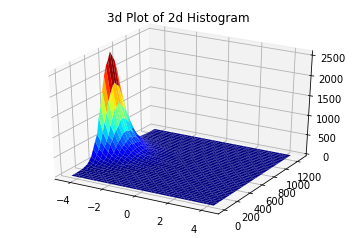

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3d Plot of 2d Histogram")
x= np.random.normal(size=100000)
y= np.random.geometric(p=0.01, size=100000)
hist, xedges, yedges = np.histogram2d(x, y, bins=40)
x,y=np.meshgrid(xedges[:-1],yedges[:-1])
ax.plot_surface(x,y,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

# Homework 4.5: This is the tutorial I learned:
# Example 1: A contour figure is really usefully for weather report.

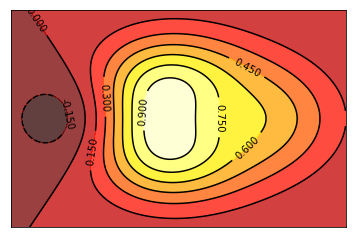

In [32]:
# first we can set a contour function
def f(x,y):
    return (1 - x / 3 + x ** 3 + y ** 2) * np.exp(- x ** 2 - y ** 2)

n=256
x=np.linspace(-2,2,n)
y=np.linspace(-2,2,n)
X,Y=np.meshgrid(x,y)   #define the mesh grid 
plt.contourf(X, Y, f(X, Y), 8, alpha = 0.75, cmap = plt.cm.hot)# fill the contour in 8 parts
# draw the contour line
C = plt.contour(X, Y, f(X, Y), 8, colors = 'black')
# show the data 
plt.clabel(C, inline = True, fontsize = 10)
plt.xticks(())
plt.yticks(())
plt.show()

Example 2: We can also project grpah to create contour:

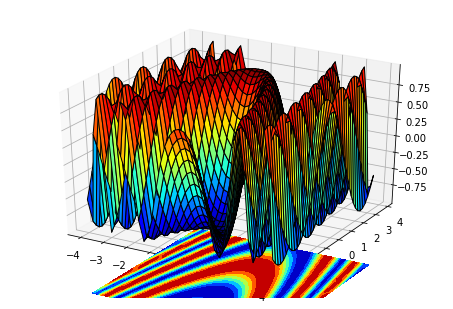

In [31]:
# we use sin function to project
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
n = 256
# define x, y
x = np.arange(-4, 4, 0.2)
y = np.arange(-4, 4, 0.2)
# generate the mesh
X, Y = np.meshgrid(x, y)
Z = np.sin(X*X+Y)
# draw the 3D face
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'jet',edgecolors='black')
# project to XY to make a contour
ax.contourf(X, Y, Z, zdir='z',offset = -2, cmap = 'jet')
plt.show()

Example 3: The scatter plot: use the scatter plot to generate colorful cells graph. This exapmle generate 1024 points and use sin(x+y) to color them:

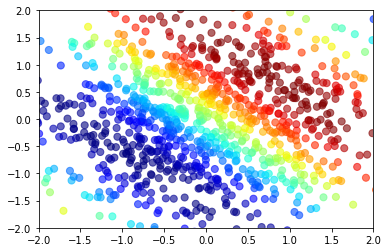

In [34]:
n=1024
x=np.random.normal(size=n)
y=np.random.normal(size=n)
color= np.sin(x+y)
plt.scatter(x,y,s=50, c=color, alpha =0.6, cmap ='jet')
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.show()

Example 4: Like the bar chart generated in lecture in one direction, some bar graph can show two sets of data in one bar graph, one up and one down:

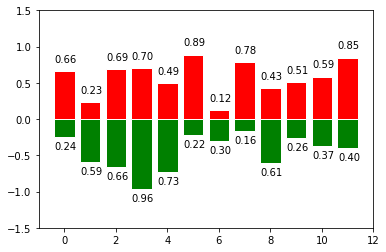

In [35]:
n = 12
x1 = np.arange(n)
#generate data in [0.1,1], assume they are some percentage data
y1 = np.random.uniform(0.1, 1.0, n)
y2 = np.random.uniform(0.1, 1.0, n)

# bar graph, up
plt.bar(x1, y1, facecolor = 'red', edgecolor = 'white')
# bar graph down
plt.bar(x1, -y2, facecolor = 'green', edgecolor = 'white')

# show data in bar graph
for x, y in zip(x1, y1):
    plt.text(x + 0.05, y + 0.1, '%.2f' % y, ha = 'center', va = 'bottom')

for x, y in zip(x1,y2):
    plt.text(x + 0.05, -y - 0.2, '%.2f' % y, ha = 'center', va = 'bottom')

# set limit for x and y
plt.xlim(-1, n)
plt.ylim(-1.5, 1.5)
plt.show()

Example 5: The pie chart is also usefully in data visualization:

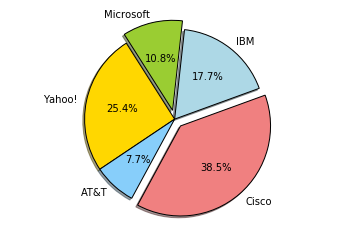

In [36]:
labels='IBM','Microsoft','Yahoo!','AT&T','Cisco'
sizes=23,14,33,10,50   #here is the size of each labels, for example profit
colors='lightblue','yellowgreen','gold','lightskyblue','lightcoral'
explode=0,0.1,0,0,0.1  #how much to offset the center
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=20,wedgeprops = { 'linewidth': 1, 'edgecolor': 'black'})
plt.axis('equal')
plt.show()